# **PageRank Perhitungan Manual**

Page Rank adalah algoritma yang digunakan oleh mesin pencari Google untuk memberikan peringkat pada halaman-halaman web dalam hasil pencarian. Algoritma ini dikembangkan oleh Larry Page dan Sergey Brin, pendiri Google, dan dinamai dari nama Larry Page.

Tujuan utama PageRank adalah mengukur seberapa penting atau otoritatif sebuah halaman web dengan mempertimbangkan struktur tautan antar halaman-halaman tersebut. Ide dasar di balik PageRank adalah bahwa halaman web yang banyak dihubungkan oleh halaman-halaman lain memiliki tingkat otoritas yang lebih tinggi.

## **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
corpus = pd.read_csv('/content/drive/MyDrive/ppw/ppw_implementasi/tugas ppw/dataset/data_corpus.csv')
corpus

,kompascom jadwal timnas indonesia malam ini pada lanjutan babak penysiihan grup piala dunia u bakal menyajikan laga melawan panama hasil bagus akan membuat garuda muda menjaga kans lolos ke babak berikutnya timnas u indonesia akan melanjutkan kiprah pada piala dunia u dengan menghadapi panama pada matchday kedua grup a laga indonesia vs panama tersebut bakal digelar di stadion gelora bung tomo surabaya pada senin pukul wib baca juga indonesia tahan ekuador di piala dunia u laga berat hasil kerja keras pada laga perdana kontra ekuador timnas u indonesia besutan bima sakti bermain imbang garuda muda sebenarnya bisa unggul lebih dulu pada menit ke lewat gol arkhan kaka namun ekuador bisa membalas pada menit ke melalui gol allen obando sementara itu panama kalah dari maroko pada pertandingan pertama grup a dua gol maroko yang bersarang ke gawang panama dicetak oleh saifdine chlaghmo dan ayman ennair baca juga timnas u indonesia vs panama welber jardim ungkap pesan bima sakti kemenangan itu membuat maroko memimpin klasemen piala dunia u grup a dengan nilai tiga adapun indonesia yang mengoleksi satu poin berada di peringkat kedua


In [ ]:
# Menghitung matriks co-occurrence dengan CountVectorizer
vectorizer = CountVectorizer()
co_occurrence_matrix = vectorizer.fit_transform(corpus).T * vectorizer.fit_transform(corpus)

# Membuat DataFrame dari matriks co-occurrence
df_co_occurrence = pd.DataFrame(co_occurrence_matrix.toarray(), columns=vectorizer.get_feature_names_out(),index=vectorizer.get_feature_names_out())
df_co_occurrence

,adapun,akan,allen,arkhan,ayman,babak,baca,bagus,bakal,berada,...,tersebut,tiga,timnas,tomo,unggul,ungkap,vs,welber,wib,yang
adapun,1,2,1,1,1,2,2,1,2,1,...,1,1,4,1,1,1,2,1,1,2
akan,2,4,2,2,2,4,4,2,4,2,...,2,2,8,2,2,2,4,2,2,4
allen,1,2,1,1,1,2,2,1,2,1,...,1,1,4,1,1,1,2,1,1,2
arkhan,1,2,1,1,1,2,2,1,2,1,...,1,1,4,1,1,1,2,1,1,2
ayman,1,2,1,1,1,2,2,1,2,1,...,1,1,4,1,1,1,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ungkap,1,2,1,1,1,2,2,1,2,1,...,1,1,4,1,1,1,2,1,1,2
vs,2,4,2,2,2,4,4,2,4,2,...,2,2,8,2,2,2,4,2,2,4
welber,1,2,1,1,1,2,2,1,2,1,...,1,1,4,1,1,1,2,1,1,2
wib,1,2,1,1,1,2,2,1,2,1,...,1,1,4,1,1,1,2,1,1,2


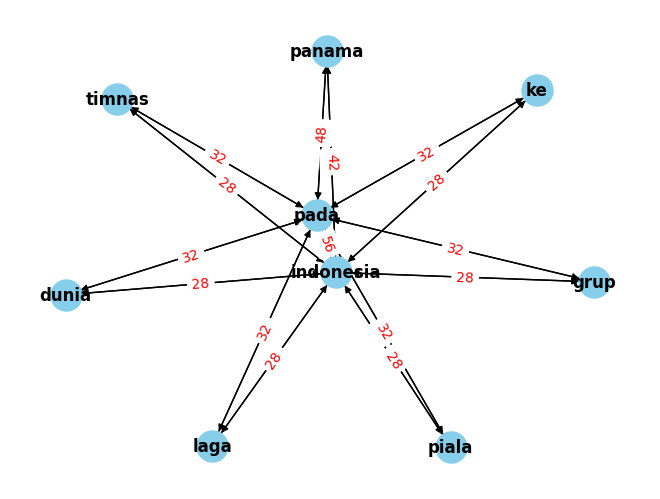

In [ ]:
G = nx.DiGraph()  # Menggunakan Directed Graph agar panah dapat ditampilkan

# Membuat graf dengan edge untuk nilai yang memenuhi kondisi
for idx, row in df_co_occurrence.iterrows():
    for col in df_co_occurrence.columns:
        weight = df_co_occurrence.loc[idx, col]
        if weight > 25 and idx != col:
            G.add_edge(idx, col, weight=weight)

pos = nx.spring_layout(G)  # Penataan node

# Menggambar grafik dengan label edge dan panah
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_weight='bold', arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5, font_color='red')

plt.show()

## **Perhitungan Manual PageRank**
Menghitung manual pagerank dengan nilai tresholdnya lebih dari 25 untuk graph dan katanya seperti pada gambar di atas dimana jumlah node atau kata yaitu 9

**Rumus :**
$$
PR(i) = (1-d) . \frac{1}{N} + d . \sum_{j∈M(i)} \frac{PR(j)}{L(j)}
$$


**KETERANGAN :**
- $( PR(i) )$ adalah PageRank dari halaman $( i )$.
- $( d )$ adalah damping factor, biasanya diatur sebagai 0.85 hingga 0.95.
- $( N )$ adalah jumlah total halaman dalam graf ( jumlah node dalam graf ).
- $( M(i) )$ adalah himpunan halaman yang memiliki tautan ke halaman $( i )$.
- $( L(j) )$ adalah jumlah tautan keluar dari halaman $(i)$.

**Jadi rumus tersebut jika dijabarkan akan menjadi :**
$$PageRank = (1-damping factor)/Total Nodes + damping factor  \times \sum_{i=1}^{n}\frac{PageRank Tetangga}{OutDegree Tetangga}$$

1. Kita cari jumlah pagerank tetangga terlebih dahulu pada rumus $\sum_{i=1}^{n}\frac{PageRank Tetangga}{OutDegree Tetangga}$ dimana nilai PageRank tetangga diberi nilai random untuk awal dan OutDegree yaitu jumlah nilai garis yang terhubung pada setiap node atau kata, lakukan iterasi sampai ke-n.

2. Jika sudah maka akan mendapatkan nilai jumlah PageRank tetangga setiap kata kemudian baru melakukan perhitungan pagerank sesuai rumus tersebut.

In [ ]:
# File perhitungan manual
df = pd.read_excel('/content/drive/MyDrive/ppw/ppw_implementasi/tugas ppw/dataset/hitung_manual_pagerank_kata.xlsx')
df_filled = df.fillna('')
df_filled

,ITERASI,kata,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,,pada,indonesia,panama,dunia,grup,ke,laga,piala,timnas,,,,
1,1,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,,,,"DEFAULT DAMPING FACTOR = 0,85"
2,2,0.236756,0.236756,0.031845,0.031845,0.031845,0.031845,0.031845,0.031845,0.031845,,,,
3,3,0.136562,0.136562,0.066977,0.066977,0.066977,0.066977,0.066977,0.066977,0.066977,,,,
4,,,,,,,,,,,,,,
5,,,,,,,,,,,,,,
6,,,,,,,,,,,,,,
7,kata,IN,OUT,,ITERASI 2,ITERASI 3,,,,,,,,
8,pada,8,8,,0.258929,0.141053,,,,,,,,
9,indonesia,8,8,,0.258929,0.141053,,,,,,,,


## **Perhitungan PageRank dengan Coding**

In [ ]:
# Hitung centrality pada berita 1 dengan PageRank
centrality = nx.pagerank(G)
# Ubah ke dalam dataframe
pagerank_df = pd.DataFrame(list(centrality.items()), columns=['Kata', 'Pagerank Centrality'])
pagerank_df = pagerank_df.sort_values(by='Pagerank Centrality', ascending=False)
pagerank_df

,Kata,Pagerank Centrality
2,pada,0.276331
1,indonesia,0.249278
6,panama,0.088212
0,dunia,0.064363
3,grup,0.064363
4,ke,0.064363
5,laga,0.064363
7,piala,0.064363
8,timnas,0.064363
